In [1]:
import numpy as np 
import pandas as pd 
from PIL import Image
import h5py


def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [2]:
with h5py.File('train_catvnoncat.h5','r') as f:
    print("Top-level keys: ",list(f.keys()))

Top-level keys:  ['list_classes', 'train_set_x', 'train_set_y']


## Cat Recognition Model

**Problem Statement**: You are given a dataset ("data.h5") containing: 
- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat 
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). 
- Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

What are H5 files?
- An H5 file (also know as .h5 or HDF5 file) is a Hierarchical Data Format version 5 file used to store and organize large amount of data in a structured and efficient way

In [3]:
train_set_x, train_set_y, test_set_x, test_set_y, classes = load_dataset()

y = 0, It is a non-cat picture.


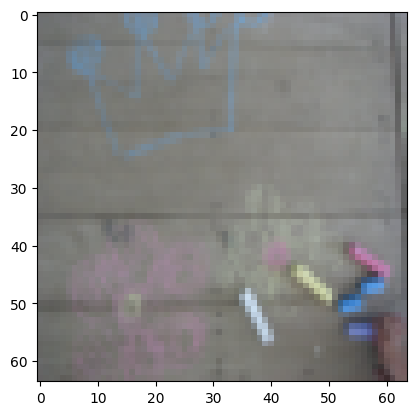

In [4]:
import matplotlib.pyplot as plt 
index = int(input("Enter a index"))

plt.imshow(train_set_x[index])
print(f"y = {train_set_y[0,index]}, It is a {classes[np.squeeze(train_set_y[:, index])].decode("utf-8")} picture.")

In [5]:
m_train = train_set_x.shape[0]
m_test = test_set_x.shape[0]

num_px = train_set_x.shape[1]

print(f"train_set_x shape: {train_set_x.shape}")
print(f"train_set_y shape: {train_set_y.shape}")
print(f"test_set_x shape: {test_set_x.shape}")
print(f"test_set_y shape: {test_set_y.shape}")
print(f"Height/Width of each image: num_px = {num_px}")
print (f"Each image is of size: ( " + str(num_px) + ", " + str(num_px) + ", 3)")


print(f"Number of training examples: m_train = {m_train}")
print(f"Number of testing examples: m_test = {m_test}")

train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)
Height/Width of each image: num_px = 64
Each image is of size: ( 64, 64, 3)
Number of training examples: m_train = 209
Number of testing examples: m_test = 50


In [6]:
train_set_x[10].shape

(64, 64, 3)

In [7]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [8]:
train_set_y

array([[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

**Exercise**: Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape **(num_px * num_px * 3, 1)**.

In [9]:
train_set_x_flatten = train_set_x.reshape(train_set_x.shape[1]*train_set_x.shape[2]*train_set_x.shape[3],train_set_x.shape[0])
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[1]*test_set_x.shape[2]*test_set_x.shape[3],test_set_x.shape[0])

print(f"train_set_x_flatten shape: {train_set_x_flatten.shape}")
print(f"test_set_x_flatten shape: {test_set_x_flatten.shape}")


train_set_x_flatten shape: (12288, 209)
test_set_x_flatten shape: (12288, 50)


In [10]:
train_set_x_flatten

array([[17, 31, 56, ..., 68, 33, 41],
       [71, 34, 44, ..., 47, 77, 40],
       [49, 79, 40, ..., 38, 46, 75],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [11]:
train_set_x_flatten[0]

array([17, 31, 56, 22, 33, 59, 25, 35, 62, 25, 35, 62, 27, 36, 64, 28, 38,
       67, 30, 41, 69, 31, 43, 73, 32, 47, 76, 34, 49, 79, 35, 50, 82, 36,
       51, 82, 35, 50, 81, 34, 49, 79, 33, 48, 79, 33, 48, 79, 32, 47, 78,
       31, 46, 76, 30, 44, 75, 29, 44, 75, 29, 44, 75, 27, 44, 74, 27, 42,
       73, 25, 41, 71, 23, 40, 72, 21, 41, 73, 21, 42, 74, 21, 41, 74, 20,
       40, 73, 20, 39, 72, 19, 39, 72, 18, 38, 71, 16, 38, 70, 14, 37, 69,
       12, 37, 68, 11, 36, 67,  9, 36, 66,  7, 34, 64,  7, 35, 66,  4, 36,
       69,  3, 36, 69,  2, 34, 65,  2, 34, 65,  1, 35, 67,  1, 34, 67,  1,
       34, 66,  0, 32, 63,  1, 30, 61,  1, 30, 62,  2, 29, 59,  0, 29, 59,
        1, 29, 59,  1, 28, 58,  1, 28, 57,  1, 28, 57,  1, 28, 57,  1, 28,
       57,  1, 25, 55,  0, 25, 55,  1, 27, 58,  1, 28, 58,  1, 28, 57,  1,
       26, 56,  1, 22, 51, 25, 36, 62, 28, 38, 64, 30, 40, 67, 30, 39, 67,
       31, 40, 68, 33, 41], dtype=uint8)

In [12]:
# Feature Scaling
# Standardize the data
# We just divide every row of the dataset by 255 (the maximum value of a pixel channel)

train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [13]:
train_set_x.shape

(12288, 209)

In [14]:
test_set_x.shape

(12288, 50)

### General Architechture of the learning algorithm

The main steps for building a Neural network are:
1. Define the model structure (such as number of input features)
2. inititalize the models parameters
3. Loop:
    - Calculate current loss(forward propagation)
    - Calculate current gradient (backward propagation)
    - update the parameters (gradient descent) 

In [15]:
# sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s
z = np.array([-10,0,12])
sigmd = np.round(sigmoid(z))
print(f"sigmoid([-10,0,12]): {sigmd}")
print(f"sigmoid([-10,0,12]): {sigmoid(z)}")

sigmoid([-10,0,12]): [0. 0. 1.]
sigmoid([-10,0,12]): [4.53978687e-05 5.00000000e-01 9.99993856e-01]


In [16]:
# initializing parameter
def initialize_parameter(dim):
    """
    Args:
        dim : size of the w vector we want (or the number of parameters in this case)
    Returns:
        w : initialized vector of shape (dim,1)
        b : initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    return w, b

dim = 3
w, b = initialize_parameter(dim)
print(w)
print(b)

    

[[0.]
 [0.]
 [0.]]
0


In [17]:
# Forward and Backward propagation
# Implement a function propagate() that computes the cost function and its gradient.
def propagate(w,b,X,Y):
    m = X.shape[1]
    
    # Forward propagation
    A = sigmoid(np.dot(w.T,X)+b)
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m 
    cost = np.squeeze(cost)
    
    # Backward Propagation
    dw = (np.dot(X,(A-Y).T))/m 
    db = (np.sum(A-Y))/m 
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    assert(cost.shape == ())
    
    grads = {"dw":dw,
             "db":db}
    return grads, cost
    
    

In [18]:
# Test
w = np.array([[1.],
              [2.]])
b = 2
X = np.array([[1.,2.,-1.],
            [3.,4.,-3.2]])
Y = np.array([[1,0,1]])

grads, cost = propagate(w,b,X,Y)

print(f"dw: {grads['dw']}")
print(f"db: {grads['db']}")
print(f"Cost: {cost}")



dw: [[0.99845601]
 [2.39507239]]
db: 0.001455578136784208
Cost: 5.801545319394553


In [19]:
# Optimization
# The goal is to learn w and b by minimizing the cost function J.
# For a parameter @, the update rule is @ = @- alph*d@, where alpha is the learning rate

def optimize(w,b,X,Y, num_iter, learning_rate, print_cost=False):
    costs = []
    for i in range(num_iter):
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        
        if i % 100 == 0:
            costs.append(cost)
        # costs.append(cost)
        # print the cost every 100 training iteration     
        if print_cost and i % 100 == 0:
            print(f"cost after iteration - {i} : {cost}")
            
    params = {"w":w,
              "b":b}
    grads = {"dw":dw,
             "db":db}
    return params, grads, costs

# test
params, grads, costs = optimize(w,b,X,Y,num_iter=100,learning_rate=0.005)
print(f"w = {params['w']}")
print(f"b = {params['b']}")
print(f"dw = {grads['dw']}")
print(f"db = {grads['db']}")



w = [[0.5108408 ]
 [0.83451128]]
b = 1.9898658979913053
dw = [[0.92136508]
 [2.1501206 ]]
db = 0.07269786772983906


In [20]:
# import matplotlib.pyplot as plt 
# plt.plot(costs)

In [21]:
# Predict Function
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    Y_prediction = (A >= 0.5) * 1.0
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

# test
w = np.array([[0.1124579],
              [0.23106775]])
b = -0.3
X_test =np.array([[1.,-1.1,-3.2],
                  [1.2,2.,0.1]])
y_pred = predict(w,b,X_test)
print("Prediction: ",y_pred)


Prediction:  [[1. 1. 0.]]


In [22]:
# Merge all the functions into a model
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate = 0.5, print_cost = False):
    """Builds the logistic regression model by calling the all the function

    Args:
        X_train (np.array): (num_px*num_px*3,m_train)
        Y_train (np.array): (1,m_train)
        X_test (np.array):  (num_px*num_px*3,m_test)
        Y_test (np.array): (1,m_test)
        num_iterations (int, optional): _description_. Defaults to 2000.
        learning_rate (float, optional): _description_. Defaults to 0.5.
        print_cost (bool, optional): _description_. Defaults to False.
    """
    
    # step - 1 
    w, b = initialize_parameter(X_train.shape[0])
    
    # step - 2 forward and backward propagation and gradient descent
    parameters, grads, costs = optimize(w,b,X_train,Y_train,num_iter=num_iterations,learning_rate=learning_rate,print_cost=print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # step - 3 prediction
    Y_pred_test = predict(w,b,X_test)
    Y_pred_train = predict(w,b,X_train)
    
    # calculate accuracy
    # Custom Accuracy=100−(Mean Absolute Error×100)
    
    test_accuracy = 100 - np.mean(np.abs(Y_pred_test-Y_test))*100
    train_accuracy = 100 - np.mean(np.abs(Y_pred_train-Y_train))*100
    
    print(f"test_accuracy: {test_accuracy:.2f}%")
    print(f"train_accuracy: {train_accuracy:.2f}%")
    
    d = {"costs":costs,
         'Y_pred_test':Y_pred_test,
         'Y_pred_train':Y_pred_train,
         'w':w,
         'b':b,
         'learning_rate':learning_rate,
         'num_iterations':num_iterations
    }
    
    return d

    

In [23]:
test_set_x.shape

(12288, 50)

In [24]:
d = model(train_set_x,train_set_y,test_set_x,test_set_y,num_iterations=2000,learning_rate=0.005,print_cost=True)

cost after iteration - 0 : 0.6931471805599453
cost after iteration - 100 : 0.7097263623007752
cost after iteration - 200 : 0.6577119065270963


cost after iteration - 300 : 0.6146107943572359
cost after iteration - 400 : 0.5780007284635371
cost after iteration - 500 : 0.5463715182209924
cost after iteration - 600 : 0.5183312353161216
cost after iteration - 700 : 0.49285151023201457
cost after iteration - 800 : 0.46925927021378894
cost after iteration - 900 : 0.44713858237057064
cost after iteration - 1000 : 0.42626228372377295
cost after iteration - 1100 : 0.4066165678579391
cost after iteration - 1200 : 0.38872327164259235
cost after iteration - 1300 : 0.3746775443488217
cost after iteration - 1400 : 0.365826084976374
cost after iteration - 1500 : 0.35853187114368096
cost after iteration - 1600 : 0.3516119021677988
cost after iteration - 1700 : 0.34501222559297534
cost after iteration - 1800 : 0.3387043873916004
cost after iteration - 1900 : 0.3326641449409403
test_accuracy: 34.00%
train_accuracy: 91.39%


- Training accuracy is close to 100%. This is a good sanity check that our model is working and has high enough capacity to fit the training data. 
- Test accuracy is 68%, since logistic regression is a linear classifier it is actually not a bad score.
- The model is clearly overfitting the training data.

y = 0, you predicted that it is a "non-cat" picture.


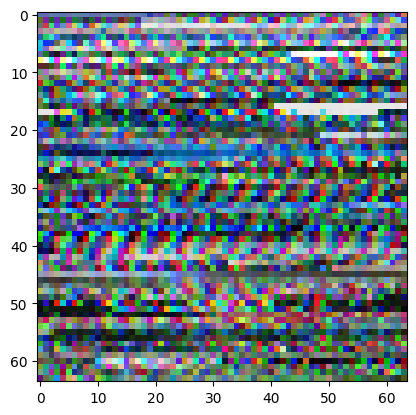

In [25]:
# lets do some prediction
index = 5
plt.imshow((test_set_x[:,index]).reshape((num_px,num_px,3)))
print("y = " + str(test_set_y[0, index]) + 
      ", you predicted that it is a \"" + 
      classes[int(d["Y_pred_test"][0, index])].decode("utf-8") +  
      "\" picture.")

Text(0.5, 1.0, 'Learning rate = 0.005')

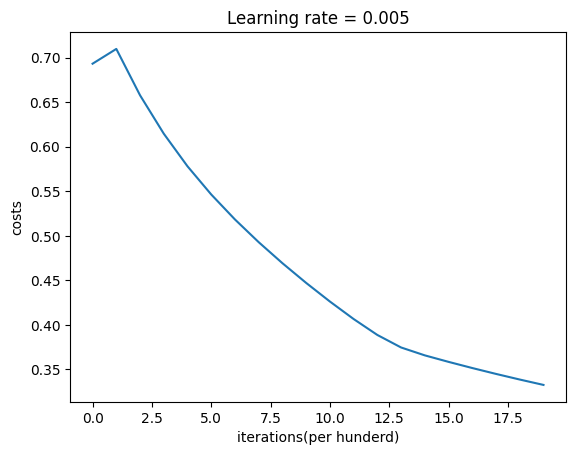

In [26]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel("costs")
plt.xlabel("iterations(per hunderd)")
plt.title(f'Learning rate = {d['learning_rate']}')

Choosing different learning rate

In [27]:
learning_rates = [0.01, 0.005, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print(f'Learning Rate : {i}')
    models[str(i)] = model(train_set_x,train_set_y,test_set_x,test_set_y,num_iterations=1500,learning_rate=i,print_cost=False)
    print('-'*100)

Learning Rate : 0.01
test_accuracy: 34.00%
train_accuracy: 71.29%
----------------------------------------------------------------------------------------------------
Learning Rate : 0.005
test_accuracy: 34.00%
train_accuracy: 87.08%
----------------------------------------------------------------------------------------------------
Learning Rate : 0.001
test_accuracy: 34.00%
train_accuracy: 74.16%
----------------------------------------------------------------------------------------------------
Learning Rate : 0.0001
test_accuracy: 34.00%
train_accuracy: 66.03%
----------------------------------------------------------------------------------------------------


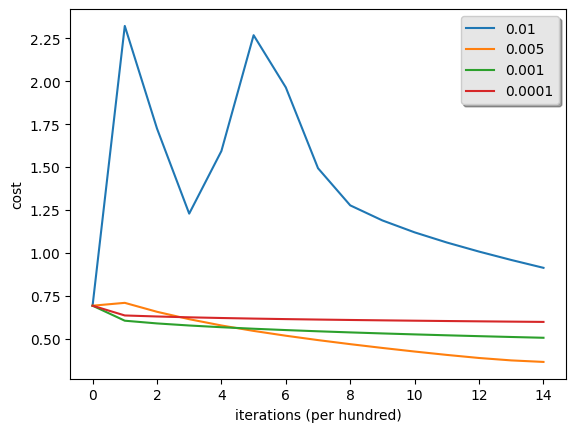

In [29]:
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]['costs']),label=str(models[str(i)]['learning_rate']))

legend = plt.legend(loc='upper right',shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.ylabel('cost')
plt.xlabel('iterations (per hundred)')
plt.show()